# **Working with MNIST to Identify Numbers**

First go to this site!
https://www.cs.ryerson.ca/~aharley/vis/conv/flat.html

Let's take a look at what our dataset looks like--

In [ ]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()

# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


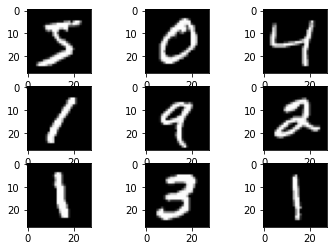

In [ ]:
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

# Creating the Model 
- Loading the digits and create an encoding for a 10 element binary vector
- 1 = index of the class value
- 0 = number for all other classes

In [ ]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((#fill in the shape of the testX data))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

Preprocessing the pixel data:

Each pixel is from a range of 0-255 (0 being black, 255 being white)
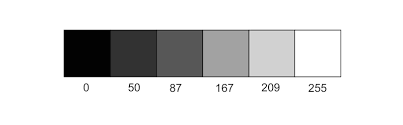

We can normalize the pixel value so it is within a range of 0 and 1

In [ ]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / # write in number of pixels
	test_norm = test_norm / # write in number of pixels
	# return normalized images
	return train_norm, test_norm

# Creating the Layers
Now let's create the CNN and all of its layers

- This will include Max Pooling (reduced dimensionality)
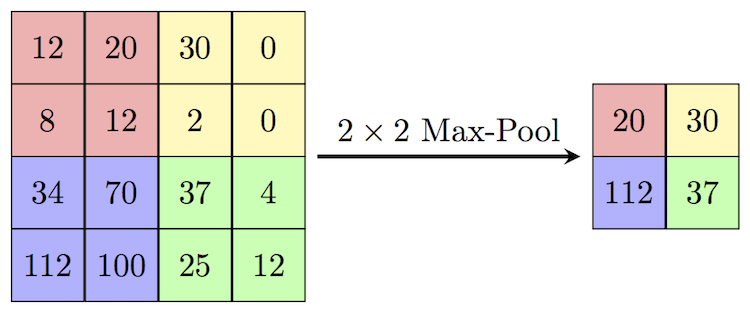



- categorical_crossentropy: used for categorical data
- sparse_categorical_crossentropy: used for integers

In [ ]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(layers.MaxPooling2D((2, 2)))
	model.add(layers.Flatten())
	model.add(layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(layers.Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss=#insert the type of loss function, metrics=['accuracy'])
	return model

**The ReLU Activation function**
- Focuses on the neurons that count! (sparsity)
- Any negative value becomes 0 (but this means if a number is negative it may not "recover")

**Kernel Initializer** 
- Used to initialize weights and changes them after they are initialized
- Takes samples from a uniform distribution

**Flatten**
- Used with CNNs to create one long feature vector 
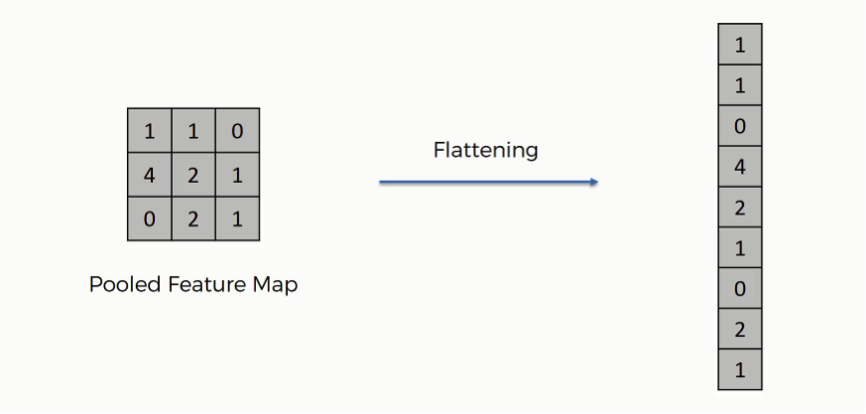

**Dense**
- Each layer receives an input from the previous one, which is why they're "densely connected"
- Dense layer as in all the neurons in the layer are connected to the next

**Softmax**
- Gives decimal probabilities to all values so they add up to 1.00 (normalization)
- Common in image recognition and essentially takes results and crushes them into results between 0 and 1

**Categorical Crossentropy**
- Any model needs to have a parameter for loss
- Our model used categorical data (with one hot encoder) so we will use this function

**Stochastic Gradient Descent**
- Converges along a curve to produce the most optimal weight
- Momentum is how fast it converges
- Learning rate is how much it will change after the weights are updated
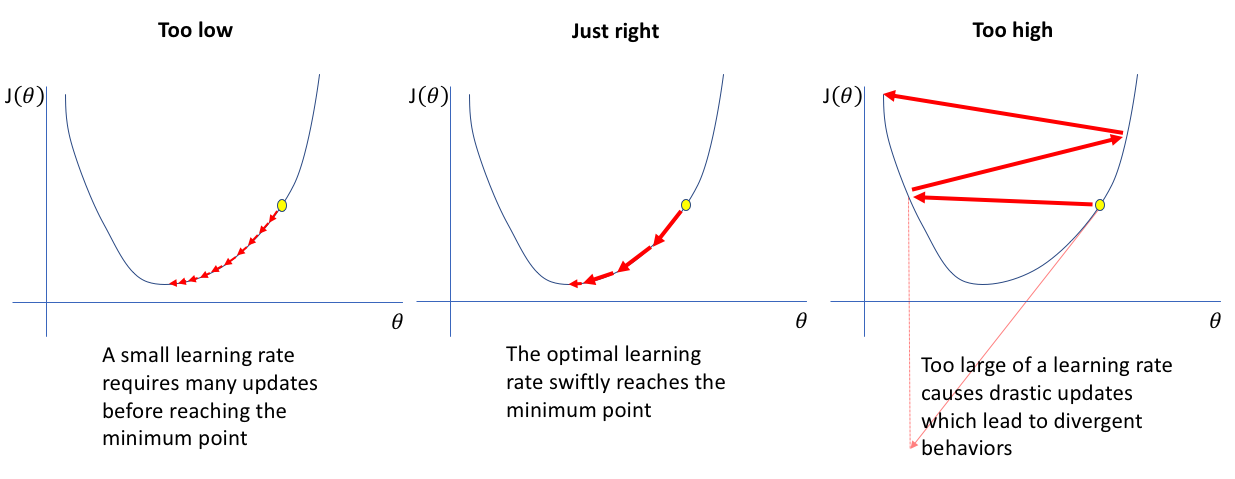


# Analyzing the Model:

In [ ]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = sklearn.model_selection.KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=2)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
  print("evaluated model")
	return scores, histories

**KFold**
- Shuffles the data
- Splits it into k groups
- Is pretty unbiased so it's a great choice for analyzing models!

Onto the designing part!! We'll create a graph to analyze our results

In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(2, 1, 1)
		pyplot.title(#Write in the name of your graph)
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(2, 1, 2)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	pyplot.show()

This function will read our ultimate performance

In [ ]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)

Now we can run the full model with this function! Try it out

In [ ]:
run_test_harness()

Here are the results: 
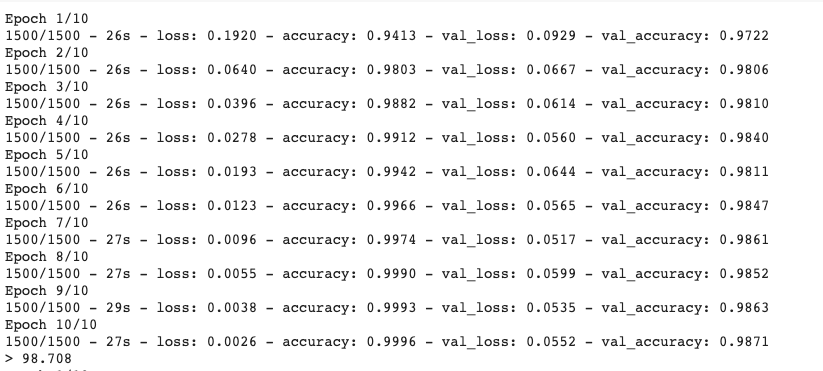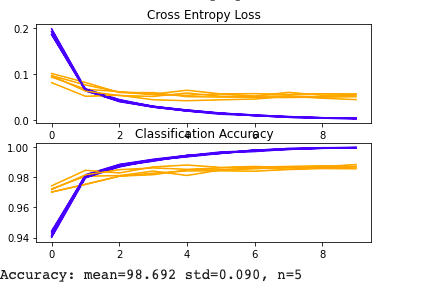

As you can see, the model is extremely accurate and the graphs represent the accuracy of the model based on multiple epochs.